[[ 1. 34.]
 [ 2. 62.]
 [ 3. 41.]
 [ 4. 43.]
 [ 5. 36.]
 [ 6. 34.]
 [ 7. 84.]
 [ 8. 66.]
 [ 9. 52.]
 [10. 74.]]
(77, 2)
Número de entradas incorrectas: 0
Parámetros del modelo fp1: [4.1327094e-02 7.7089542e+01]
Error del modelo fp1: [72621.16367843]
Parámetros del modelo fp2: [-0.05082819  4.00592559 24.88899522]
Error del modelo fp2: [33803.98314836]


C:\Users\paola\Anaconda3\lib\site-packages\ipykernel_launcher.py:201: RankWarning: Polyfit may be poorly conditioned




xb =  [38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55.
 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73.
 74. 75. 76. 77.] 


Errores para el conjunto completo de datos:
Error d=1: 72621.163678
Error d=2: 33803.983148
Error d=3: 33562.175171
Error d=10: 27888.599805
Error d=80: 22759.440286
Errores solamente después del punto de inflexión
Error d=1: 39175.216842
Error d=2: 15438.144976
Error d=3: 15757.502484
Error d=10: 12147.150576
Error d=80: 8921.816777
Error de inflexión=32569.977512
Entrenamiento de datos únicamente despúes del punto de inflexión
Errores después del punto de inflexión
Error d=1: 15319.527298
Error d=2: 14846.247436
Error d=3: 12591.700300
Error d=10: 9934.863842
Error d=81: 7734.987757


xb =  [38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55.
 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73.
 74. 75. 76. 77.] 




len(xb) =  40 




split_idx =  12 




range(len(xb)) =

C:\Users\paola\Anaconda3\lib\site-packages\ipykernel_launcher.py:271: RankWarning: Polyfit may be poorly conditioned
C:\Users\paola\Anaconda3\lib\site-packages\ipykernel_launcher.py:341: RankWarning: Polyfit may be poorly conditioned


          2
-0.01845 x + 0.07894 x + 138
          2
-0.01845 x + 0.07894 x + 90.02

48 contagios  esperados en la dia 77 semana  10.289394


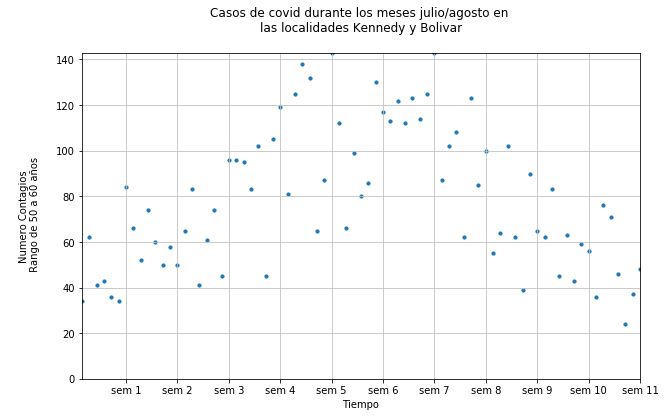

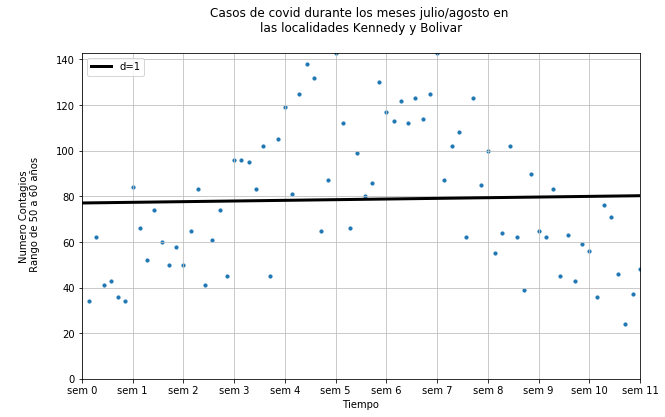

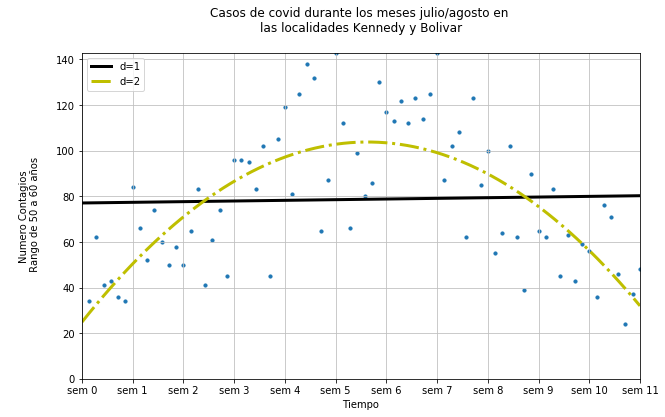

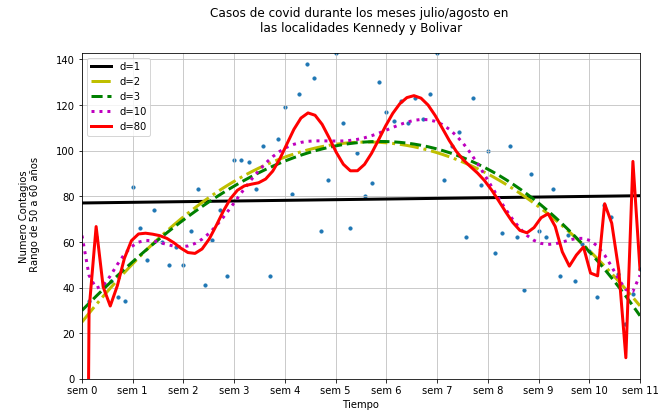

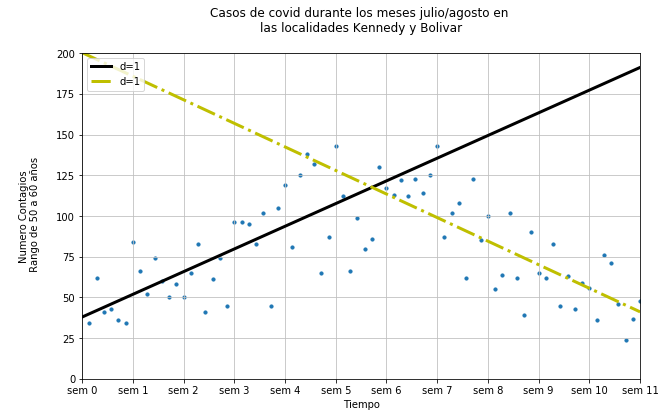

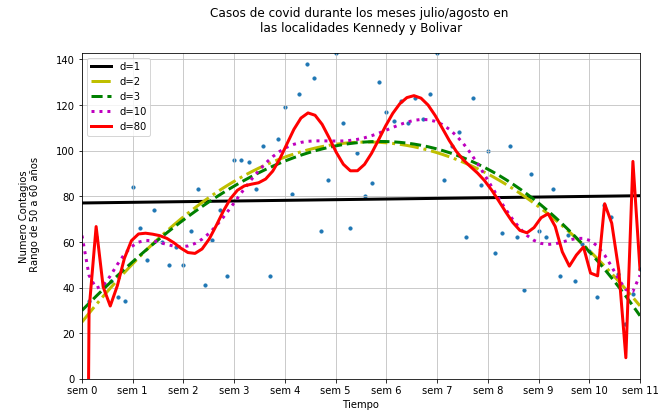

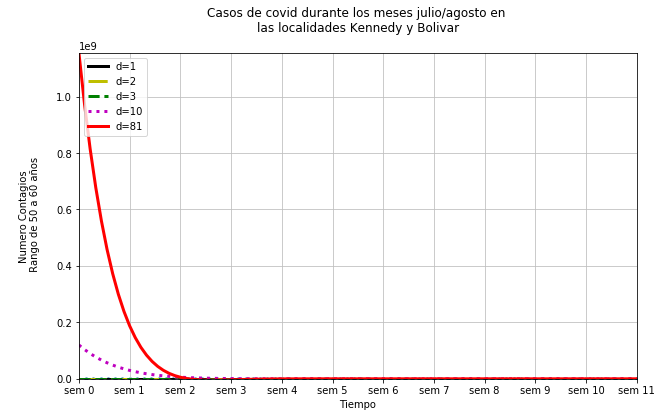

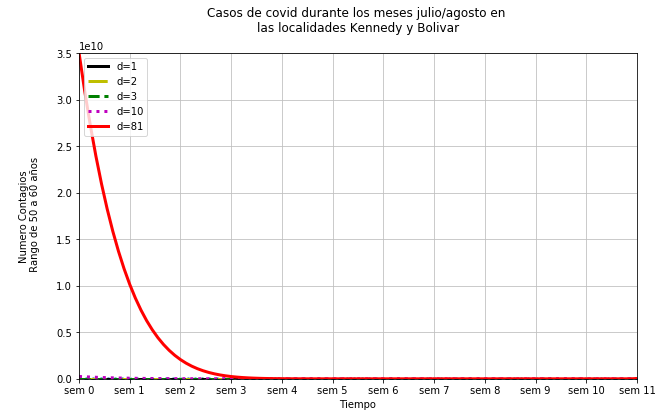

In [5]:
# PRESENTADO POR:ANGIE PAOLA VILLADA ORTIZ 1089721336 /ADRIANA QUITUMBO 1088311399

#COMPUTACIÓN BLANDA - Sistemas y Computación

# -----------------------------------------------------------------
# AJUSTES POLINOMIALES
# -----------------------------------------------------------------
# Lección 06
#
#   ** Se importan los archivos de trabajo
#   ** Se crean las variables
#   ** Se generan los modelos
#   ** Se grafican las funciones
#
# -----------------------------------------------------------------

# Se importa la librería del Sistema Operativo
# Igualmente, la librería utils y numpy
# -----------------------------------------------------------------
import os

# Directorios: chart y data en el directorio de trabajo
# DATA_DIR es el directorio de los datos
# CHART_DIR es el directorio de los gráficos generados
# -----------------------------------------------------------------
from utils import DATA_DIR, CHART_DIR
import numpy as np

# Se eliminan las advertencias por el uso de funciones que
# en el futuro cambiarán
# -----------------------------------------------------------------
np.seterr(all='ignore')

# Se importa la librería scipy y matplotlib
# -----------------------------------------------------------------
import scipy as sp
import matplotlib.pyplot as plt

# Datos de trabajo
# -----------------------------------------------------------------
data = np.genfromtxt(os.path.join(DATA_DIR, "CasosCovid2020_Localidades_kennedy_bolivar_rangoEdad_50y60_mes_julio_Agosto_Sept.tsv"), 
                     delimiter="\t")

# Se establece el tipo de dato
data = np.array(data, dtype=np.float64)
print(data[:10])
print(data.shape)

# Se definen los colores
# g = green, k = black, b = blue, m = magenta, r = red
# g = verde, k = negro, b = azul, m = magenta, r = rojo
colors = ['k', 'y', 'g', 'm', 'r']

# Se definen los tipos de líneas
# los cuales serán utilizados en las gráficas
linestyles = ['-', '-.', '--', ':', '-']

# Se crea el vector x, correspondiente a la primera columna de data
# Se crea el vercot y, correspondiente a la segunda columna de data
x = data[:, 0]
y = data[:, 1]

# la función isnan(vector) devuelve un vector en el cual los TRUE
# son valores de tipo nan, y los valores FALSE son valores diferentes
# a nan. Con esta información, este vector permite realizar 
# transformaciones a otros vectores (o al mismo vector), y realizar
# operaciones como sumar el número de posiciones TRUE, con lo
# cual se calcula el total de valores tipo nan
print("Número de entradas incorrectas:", np.sum(np.isnan(y)))

# Se eliminan los datos incorrectos
# -----------------------------------------------------------------

# Los valores nan en el vector y deben eliminarse
# Para ello se crea un vector TRUE y FALSE basado en isnan
# Al negar dichos valores (~), los valores que son FALSE se vuelven
# TRUE, y se corresponden con aquellos valores que NO son nan
# Si el vector x, que contiene los valores en el eje x, se afectan
# a partir de dicho valores lógicos, se genera un nuevo vector en
# el que solos se toman aquellos que son TRUE. Por tanto, se crea
# un nuevo vector x, en el cual han desaparecido los correspondientes
# valores de y que son nan

# Esto mismo se aplica, pero sobre el vector y, lo cual hace que tanto
# x como y queden completamente sincronizados: sin valores nan
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

# CON ESTA FUNCIÓN SE DEFINE UN MODELO, EL CUAL CONTIENE 
# el comportamiento de un ajuste con base en un grado polinomial
# elegido
# -----------------------------------------------------------------
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' dibujar datos de entrada '''

    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(10, 6))
    
    # Borra el espacio de la figura
    plt.clf()
    
    # Un gráfico de dispersión de y frente a x con diferentes tamaños 
    # y colores de marcador (tamaño = 10)
    plt.scatter(x, y, s=10)
    
    # Títulos de la figura
    # Título superior
    plt.title("Casos de covid durante los meses julio/agosto en \nlas localidades Kennedy y Bolivar\n")
    
    # Título en la base
    plt.xlabel("Tiempo")
    
    # Título lateral
    plt.ylabel("\nNumero Contagios\n Rango de 50 a 60 años\n")
    
    # Obtiene o establece las ubicaciones de las marcas 
    # actuales y las etiquetas del eje x.
    
    # Los primeros corchetes ([]) se refieren a las marcas en x
    # Los siguientes corchetes ([]) se refieren a las etiquetas
    
    # En el primer corchete se tiene: 1*7*24 + 2*7*24 + ..., hasta
    # completar el total de puntos en el eje horizontal, según
    # el tamaño del vector x
    
    # Además, se aprovecha para calcular los valores de w, los
    # cuales se agrupan en paquetes de w*7*24. Esto permite
    # determinar los valores de w desde 1 hasta 5, indicando
    # con ello que se tiene un poco más de 4 semanas
    
    # Estos valores se utilizan en el segundo corchete para
    # escribir las etiquetas basadas en estos valores de w
    
    # Por tanto, se escriben etiquetas para w desde 1 hasta
    # 7, lo cual constituye las semanas analizadas
    plt.xticks(
        [w * 7 for w in range(20)], 
        ['sem %i' % w for w in range(20)])

    # Aquí se evalúa el tipo de modelo recibido
    # Si no se envía ninguno, no se dibuja ninguna curva de ajuste
    if models:
        
        # Si no se define ningún valor para mx (revisar el 
        # código más adelante), el valor de mx será
        # calculado con la función linspace

        # NOTA: linspace devuelve números espaciados uniformemente 
        # durante un intervalo especificado. En este caso, sobre
        # el conjunto de valores x establecido
        if mx is None:
            mx = np.linspace(0, x[-1], 80)
        
        # La función zip () toma elementos iterables 
        # (puede ser cero o más), los agrega en una tupla y los devuelve

# HASTA AQUÍ ESTÁ RESUELTO

# --------------------------------------------------------------------

# AQUÍ INICIA LA TAREA DE DOCUMENTACIÓN

# --------------------------------------------------------------------
        
        # Aquí se realiza un ciclo .....
        
        for model, style, color in zip(models, linestyles, colors):
            # print "Modelo:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=3, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax)
        print("VALOR DE YMAX !!!!: ", ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# Primera mirada a los datos
# -----------------------------------------------------------------
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))
f100 = sp.poly1d(np.polyfit(x, y, 80))

# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, 
                                                "1400_01_04.png"))

# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# -----------------------------------------------------------------
inflexion = 5.3 * 7
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]

xb = x[int(inflexion):]
yb = y[int(inflexion):]

print("\n\nxb = ", 
      xb, "\n\n")

# Se grafican dos líneas rectas
# -----------------------------------------------------------------
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))

# Se presenta el modelo basado en el punto de inflexión
# -----------------------------------------------------------------
plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

# Función de error
# -----------------------------------------------------------------
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

# Se imprimen los errores
# -----------------------------------------------------------------
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

# Se extrapola de modo que se proyecten respuestas en el futuro
# -----------------------------------------------------------------
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=np.linspace(0 * 7, 11 *7, 80),
    ymax=0, xmin=0 *7)

# ---------------------------------------------------------------

# HASTA AQUÍ ES LA TAREA EN SU FASE DE ENTENDIMIENTO Y GENERACIÓN
# DE COMENTARIOS POR LÍNEA

# La parte que sigue es relativa al entrenamiento del modelo
# y la predicción

print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
fb100 = sp.poly1d(np.polyfit(xb, yb, 100))

print("Errores después del punto de inflexión")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

# Gráficas después del punto de inflexión
# -----------------------------------------------------------------
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=np.linspace(0 * 7, 11 * 7, 100),
    ymax=0, xmin=0 * 7)

# =================================================================
# ANÁLISIS DE LA PREDICCIÓN REALIZADA
# =================================================================

# Separa el entrenamiento de los datos de prueba
# -----------------------------------------------------------------
# Número de datos de muestreo  para entrenamiento
# -----------------------------------------------------------------
frac = 0.3
split_idx = int(frac * len(xb))

print("\n\nxb = ", xb, "\n\n")
print("\n\nlen(xb) = ", len(xb), "\n\n")
print("\n\nsplit_idx = ", split_idx, "\n\n")

shuffled = sp.random.permutation(list(range(len(xb))))

print("\n\nrange(len(xb)) = ", range(len(xb)), "\n\n")

print("\n\nlist(range(len(xb))) = ", list(range(len(xb))), "\n\n")

print("\n\nshuffled = sp.random.permutation(list(range(len(xb)))) = ", 
      sp.random.permutation( list( range( len(xb) ) ) ), "\n\n")

print("\n\nshuffled ordenado = sp.random.permutation(list(range(len(xb)))) = ", 
      sorted( sp.random.permutation( list( range( len(xb) ) ) ) ), "\n\n")

print("\n\nshuffled = sp.random.permutation(list(range(len(xb)))) = ", 
      sp.random.permutation( list( range( len(xb) ) ) ), "\n\n")

test = sorted(shuffled[:split_idx])

print("\n\ntest = sorted(shuffled[:split_idx]) = ", 
      sorted(shuffled[:split_idx]), "\n\n")

# 44 índice de xb aleatorios ordenados
train = sorted(shuffled[split_idx:])

print("\n\ntrain = sorted(shuffled[split_idx:]) : ", train, "\n\n")

print("\n\nxb[train] = ", xb[train], "\n\n")

# La función fbt2(x) - 48 permite encontrar las raices para la cual
# cumple la predicción
# ----------------------------------------------------------------------
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-48= \n%s" % (fbt2-48))

fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Prueba de error para después del punto de inflexión")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 7, 11 * 7, 100),
    ymax=0, xmin=0 * 7)

# Se resuelve para la función de grado 2
# --------------------------------------------------------------------
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 48)
alcanzado_max = fsolve(fbt2 - 48, x0=77) / (7)
print("\n48 contagios  esperados en la dia 77 semana  %f" % 
      alcanzado_max[0])